# Importing libs

In [1]:
import numpy as np
import math
import random

# Simple Multi Layer Perceptron From Scratch

#### Activation Functions

In [2]:
def step_func(x):
    return 1 if x >= 0 else 0

In [3]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

#### Output function

In [4]:
def neuron_output(weights, x):
    return sigmoid(np.dot(weights, x))

### Feed-Forward

It receives a neural network, represented as a list of lists of weights lists, and returns the output from the input

In [5]:
def feed_forward(neural_network, input_vec):
    outputs = []
    
    # Process one layer at a time
    for layer in neural_network:
        input_with_bias = list(input_vec) + [1]
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)
        
        input_vec = output
    
    return outputs

# Feed-Forward network example

### Neural network simulating XOR port

The weights chosen for the XOR network were chosen precisely to implement the or-exclusive function. This function is not linear, so only one Perceptron is not able to adjust to this function.
The weights of the neurons are chosen so that the first layer is composed of an AND neuron and another OR and the second layer is composed of a neuron "second entrance and not the first one".

- Weights AND: [k, k, -3k]
- Weights OR: [k, k, -0.5k]
- Weights "second entrance and not the first one": [-k, k, -0.5k]

<img src="xor_img.png" alt="Drawing" style="width: 550px;"/>

In [6]:
xor_network = [# hidden layer
                [[20, 20, -30], #AND
                 [20, 20, -10]], # OR
               # output layer
                 [[-60, 60, -30]]] # second entrance and not the first one

for x in [0, 1]:
    for y in [0, 1]:
        print(x, y, feed_forward(xor_network, [x, y])[-1])

0 0 [9.38314668300676e-14]
0 1 [0.9999999999999059]
1 0 [0.9999999999999059]
1 1 [9.383146683006828e-14]


# Backpropagation

### Backpropagation Step by Step:
 

- Run the feed_forward for an input and save the outputs of each neuron
- Calculate the error for each neuron (target - output)
- Calculate the gradient for this error as a function of the weights of the neural network
- Adjust the weights in the direction that the error decreases
- Propagate output errors to hidden layers
- Calculate the gradients of these errors and adjust the weights of all hidden layers

In [7]:
def backpropagate(network, input_vec, targets):
    
    # feed_forward for the input
    hidden_outputs, outputs = feed_forward(network, input_vec)
    
    # Calculates the error for the output
    output_deltas = [output * (1 - output) * (output - target) for output, target in zip(outputs, targets)]
    
    # Adjusts the weights for the output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
        # -1 to focus on the last layer (of output)
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjusts the j-th weight of this neuron
            output_neuron[j] -= output_deltas[i] * hidden_output
    
    # Calculates the error for the hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) * np.dot(output_deltas, [n[i] for n in output_layer])
                    for i, hidden_output in enumerate(hidden_outputs)]
    
    # Adjusts the weights for the hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vec + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

# Neural Network vs Captcha

Let's train a neural network to try to defeat a simple captcha. Each captcha will be interpreted as a 5x5 matrix.

In [8]:
zero = [1, 1, 1, 1, 1,
        1, 0, 0, 0, 1,
        1, 0, 0, 0, 1,
        1, 0, 0, 0, 1,
        1, 1, 1, 1, 1]
one = [0, 0, 1, 0, 0,
       0, 0, 1, 0, 0,
       0, 0, 1, 0, 0,
       0, 0, 1, 0, 0,
       0, 0, 1, 0, 0]
two = [1, 1, 1, 1, 1,
       0, 0, 0, 0, 1,
       1, 1, 1, 1, 1,
       1, 0, 0, 0, 0,
       1, 1, 1, 1, 1]
three = [1, 1, 1, 1, 1,
         0, 0, 0, 0, 1,
         1, 1, 1, 1, 1,
         0, 0, 0, 0, 1,
         1, 1, 1, 1, 1]
four = [1, 0, 0, 0, 1,
        1, 0, 0, 0, 1,
        1, 1, 1, 1, 1,
        0, 0, 0, 0, 1,
        0, 0, 0, 0, 1]
five = [1, 1, 1, 1, 1,
       1, 0, 0, 0, 0,
       1, 1, 1, 1, 1,
       0, 0, 0, 0, 1,
       1, 1, 1, 1, 1]
six = [1, 1 ,1, 1 ,1,
       1, 0, 0, 0, 0,
       1, 1, 1, 1, 1,
       1, 0, 0, 0, 1,
       1, 1, 1, 1, 1]
seven = [1, 1, 1, 1, 1,
         0, 0, 0, 0, 1,
         0, 0, 0, 0, 1,
         0, 0, 0, 0, 1,
         0, 0, 0, 0, 1]
eight = [1, 1, 1, 1, 1,
         1, 0, 0, 0, 1,
         1, 1, 1, 1, 1,
         1, 0, 0, 0, 1,
         1, 1, 1, 1, 1]
nine = [1, 1, 1, 1, 1,
        1, 0, 0, 0, 1,
        1, 1, 1, 1, 1,
        0, 0, 0, 0, 1,
        1, 1, 1, 1, 1]

Now, we concatenate each number in just one list

In [9]:
inputs = [zero, one, two, three, four, five, six, seven, eight, nine]
print(np.array(inputs).shape)

(10, 25)


For the targets, we can create a diagonal matrix 10x10. This is One-Hot encoded.

In [10]:
targets = [[1 if i == j else 0 for i in range(10)] for j in range(10)]
print(np.array(targets).shape)

(10, 10)


Now, we build the Neural Network. The input size is 25 (5x5), 5 hidden neurons are suficiente for this task, and 10 neurons for the last layer, since there are 10 classes.

All the initial weights are initialized as random.

In [11]:
random.seed(42)
input_size = 25
num_hidden = 5
num_class = 10

hidden_layer = [[random.random() for _ in range(input_size + 1)]
               for _ in range(num_hidden)]

output_layer = [[random.random() for _ in range(num_hidden + 1)]
               for _ in range(num_class)]

network = [hidden_layer, output_layer]

The train function is pretty strait forward. Just executing backpropagation for some epochs.

In [12]:
def train(network, epochs, inputs, targets):
    
    for _ in range(epochs):
        for input_vec, target_vec in zip(inputs, targets):
            backpropagate(network, input_vec, target_vec)

10000 Epochs are more then enough, 14seconds on my computer.

In [13]:
%%time
train(network, 10000, inputs, targets)

CPU times: user 12.5 s, sys: 27.9 ms, total: 12.5 s
Wall time: 12.5 s


The prediction will be the output of the last layer. The argmax function will select the largest probability on that layer for the prediction.

In [14]:
def predict(network, x):
    return np.argmax(feed_forward(network, x)[-1])

### Testing the Network

Let's test the network trying to classify data that is not in the training set. For this, we will use numbers drawn in a slightly different way.

<img src="examples.png" alt="Drawing" style="width: 350;"/>

In [15]:
# Testing with a different 3 
predict(network, [0, 1, 1, 1, 1,
                  0, 0, 0, 1, 1,
                  0, 1, 1, 1, 1,
                  0, 0, 0, 1, 1,
                  0, 1 ,1, 1 ,1])

1

In [16]:
# Testing with a different 7 
predict(network, [1, 1, 1, 1, 1,
                  0, 0, 0, 1, 0,
                  0, 0, 1, 0, 0,
                  0, 1, 0, 0, 0,
                  1, 0 ,0, 0 ,0])

1

In [17]:
# Testing with a different 8 
predict(network, [0, 1, 1, 1, 0,
                  1, 0, 0, 0, 1,
                  1, 1, 1, 1, 1,
                  1, 0, 0, 0, 1,
                  0, 1 ,1, 1 ,0])

1

## Trying to visualize what the neural network does

We can easely check how as the weights distributed. By plotting them in a matrix, the large weights will be blacker and the lower ones will be whiter

In [18]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [19]:
def show_weights(weights):
    abs_weights = list(map(abs, weights))
    
    # transform the weights in a 5x5 grid
    grid = [abs_weights[row:(row+5)] for row in range(0,25,5)] 

    ax = plt.gca() #

    ax.imshow(grid,
              cmap='binary', # uses black and white
              interpolation='none')

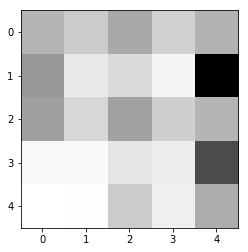

In [20]:
show_weights(network[0][0])